<a href="https://colab.research.google.com/github/yy0750/test/blob/main/Frequency_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install konlpy
!pip install squarify
!apt -qq -y install fonts-nanum
# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.3 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import seaborn as sns
import squarify
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# sns.set_theme(style="white")
# plt.style.use('seaborn-white')

<ipython-input-4-e64cb385182b>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 데이터 전처리

In [9]:
df=pd.read_csv("/content/drive/MyDrive/자연어처리/data11.csv")
df['사람문장'] = df['사람문장1'] + df['사람문장2']

print(df.shape)
print(df.isnull().sum()) #결측치

(46009, 8)
번호        0
연령        0
성별        0
감정_대분류    0
감정_소분류    0
사람문장1     0
사람문장2     0
사람문장      0
dtype: int64


In [ ]:
# 정규 표현식 함수 정의
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub(' ', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

# BoW 벡터 생성
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    #nouns = okt.nouns(result)
    nouns = okt.morphs(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# 불용어
stopwords = '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','아','휴','아이구','아이쿠','아이고','어','나','우리','저희','따라','의해','을','를','에','의','가','으로','로','에게','뿐이다','의거하여','근거하여','입각하여','기준으로','예하면','예를 들면','예를 들자면','저','소인','소생','저희','지말고','하지마','하지마라','다른','물론','또한','그리고','비길수 없다','해서는 안된다','뿐만 아니라','만이 아니다','만은 아니다','막론하고','관계없이','그치지 않다','그러나','그런데','하지만','든간에','논하지 않다','따지지 않다','설사','비록','더라도','아니면','만 못하다','하는 편이 낫다','불문하고','향하여','향해서','향하다','쪽으로','틈타','이용하여','타다','오르다','제외하고','이 외에','이 밖에','하여야','비로소','한다면 몰라도','외에도','이곳','여기','부터','기점으로','따라서','할 생각이다','하려고하다','이리하여','그리하여','그렇게 함으로써','하지만','일때','할때','앞에서','중에서','보는데서','으로써','로써','까지','해야한다','일것이다','반드시','할줄알다','할수있다','할수있어','임에 틀림없다','한다면','등','등등','제','겨우','단지','다만','할뿐','딩동','댕그','대해서','대하여','대하면','훨씬','얼마나','얼마만큼','얼마큼','남짓','여','얼마간','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한','그러나','그렇지만','하지만','이외에도','대해 말하자면','뿐이다','다음에','반대로','반대로 말하자면','이와 반대로','바꾸어서 말하면','바꾸어서 한다면','만약','그렇지않으면','까악','툭','딱','삐걱거리다','보드득','비걱거리다','꽈당','응당','해야한다','에 가서','각','각각','여러분','각종','각자','제각기','하도록하다','와','과','그러므로','그래서','고로','한 까닭에','하기 때문에','거니와','이지만','대하여','관하여','관한','과연','실로','아니나다를가','생각한대로','진짜로','한적이있다','하곤하였다','하','하하','허허','아하','거바','와','오','왜','어째서','무엇때문에','어찌','하겠는가','무슨','어디','어느곳','더군다나','하물며','더욱이는','어느때','언제','야','이봐','어이','여보시오','흐흐','흥','휴','헉헉','헐떡헐떡','영차','여차','어기여차','끙끙','아야','앗','아야','콸콸','졸졸','좍좍','뚝뚝','주룩주룩','솨','우르르','그래도','또','그리고','바꾸어말하면','바꾸어말하자면','혹은','혹시','답다','및','그에 따르는','때가 되어','즉','지든지','설령','가령','하더라도','할지라도','일지라도','지든지','몇','거의','하마터면','인젠','이젠','된바에야','된이상','만큼','어찌됏든','그위에','게다가','점에서 보아','비추어 보아','고려하면','하게될것이다','일것이다','비교적','좀','보다더','비하면','시키다','하게하다','할만하다','의해서','연이서','이어서','잇따라','뒤따라','뒤이어','결국','의지하여','기대여','통하여','자마자','더욱더','불구하고','얼마든지','마음대로','주저하지 않고','곧','즉시','바로','당장','하자마자','밖에 안된다','하면된다','그래','그렇지','요컨대','다시 말하자면','바꿔 말하면','즉','구체적으로','말하자면','시작하여','시초에','이상','허','헉','허걱','바와같이','해도좋다','해도된다','게다가','더구나','하물며','와르르','팍','퍽','펄렁','동안','이래','하고있었다','이었다','에서','로부터','까지','예하면','했어요','해요','함께','같이','더불어','마저','마저도','양자','모두','습니다','가까스로','하려고하다','즈음하여','다른','다른 방면으로','해봐요','습니까','했어요','말할것도 없고','무릎쓰고','개의치않고','하는것만 못하다','하는것이 낫다','매','매번','들','모','어느것','어느','로써','갖고말하자면','어디','어느쪽','어느것','어느해','어느 년도','라 해도','언젠가','어떤것','어느것','저기','저쪽','저것','그때','그럼','그러면','요만한걸','그래','그때','저것만큼','그저','이르기까지','할 줄 안다','할 힘이 있다','너','너희','당신','어찌','설마','차라리','할지언정','할지라도','할망정','할지언정','구토하다','게우다','토하다','메쓰겁다','옆사람','퉤','쳇','의거하여','근거하여','의해','따라','힘입어','그','다음','버금','두번째로','기타','첫번째로','나머지는','그중에서','견지에서','형식으로 쓰여','입장에서','위해서','단지','의해되다','하도록시키다','뿐만아니라','반대로','전후','전자','앞의것','잠시','잠깐','하면서','그렇지만','다음에','그러한즉','그런즉','남들','아무거나','어찌하든지','같다','비슷하다','예컨대','이럴정도로','어떻게','만약','만일','위에서 서술한바와같이','인 듯하다','하지 않는다면','만약에','무엇','무슨','어느','어떤','아래윗','조차','한데','그럼에도 불구하고','여전히','심지어','까지도','조차도','하지 않도록','않기 위하여','때','시각','무렵','시간','동안','어때','어떠한','하여금','네','예','우선','누구','누가 알겠는가','아무도','줄은모른다','줄은 몰랏다','하는 김에','겸사겸사','하는바','그런 까닭에','한 이유는','그러니','그러니까','때문에','그','너희','그들','너희들','타인','것','것들','너','위하여','공동으로','동시에','하기 위하여','어찌하여','무엇때문에','붕붕','윙윙','나','우리','엉엉','휘익','윙윙','오호','아하','어쨋든','만 못하다','하기보다는','차라리','하는 편이 낫다','흐흐','놀라다','상대적으로 말하자면','마치','아니라면','쉿','그렇지 않으면','그렇지 않다면','안 그러면','아니었다면','하든지','아니면','이라면','좋아','알았어','하는것도','그만이다','어쩔수 없다','하나','일','일반적으로','일단','한켠으로는','오자마자','이렇게되면','이와같다면','전부','한마디','한항목','근거로','하기에','아울러','하지 않도록','않기 위해서','이르기까지','이 되다','로 인하여','까닭으로','이유만으로','이로 인하여','그래서','이 때문에','그러므로','그런 까닭에','알 수 있다','결론을 낼 수 있다','으로 인하여','있다','어떤것','관계가 있다','관련이 있다','연관되다','어떤것들','에 대해','이리하여','그리하여','여부','하기보다는','하느니','하면 할수록','운운','이러이러하다','하구나','하도다','다시말하면','다음으로','에 있다','에 달려 있다','우리','우리들','오히려','하기는한데','어떻게','어떻해','어찌됏어','어때','어째서','본대로','자','이','이쪽','여기','이것','이번','이렇게말하자면','이런','이러한','이와 같은','요만큼','요만한 것','얼마 안 되는 것','이만큼','이 정도의','이렇게 많은 것','이와 같다','이때','이렇구나','것과 같이','끼익','삐걱','따위','와 같은 사람들','부류의 사람들','왜냐하면','중의하나','오직','오로지','에 한하다','하기만 하면','도착하다','까지 미치다','도달하다','정도에 이르다','할 지경이다','결과에 이르다','관해서는','여러분','하고 있다','한 후','혼자','자기','자기집','자신','우에 종합한것과같이','총적으로 보면','총적으로 말하면','총적으로','대로 하다','으로서','참','그만이다','할 따름이다','쿵','탕탕','쾅쾅','둥둥','봐','봐라','아이야','아니','와아','응','아이','참나','년','월','일','령','영','일','이','삼','사','오','육','륙','칠','팔','구','이천육','이천칠','이천팔','이천구','하나','둘','셋','넷','다섯','여섯','일곱','여덟','아홉','령','영'

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['사람문장'].tolist())
#word_list = vect.get_feature_names()
#count_list = bow_vect.toarray().sum(axis=0)

print(bow_vect.shape)

##### 빈도 탐색

In [ ]:
corpus = " ".join(df['사람문장'].tolist())
counter = text_cleaning(corpus)

counter = Counter(counter)
counter.most_common(10)

[('너무', 15029),
 ('친구', 12106),
 ('같아', 7434),
 ('하고', 7098),
 ('이야', 6159),
 ('사람', 5651),
 ('하는', 5332),
 ('생각', 5264),
 ('해서', 4953),
 ('정말', 4152)]

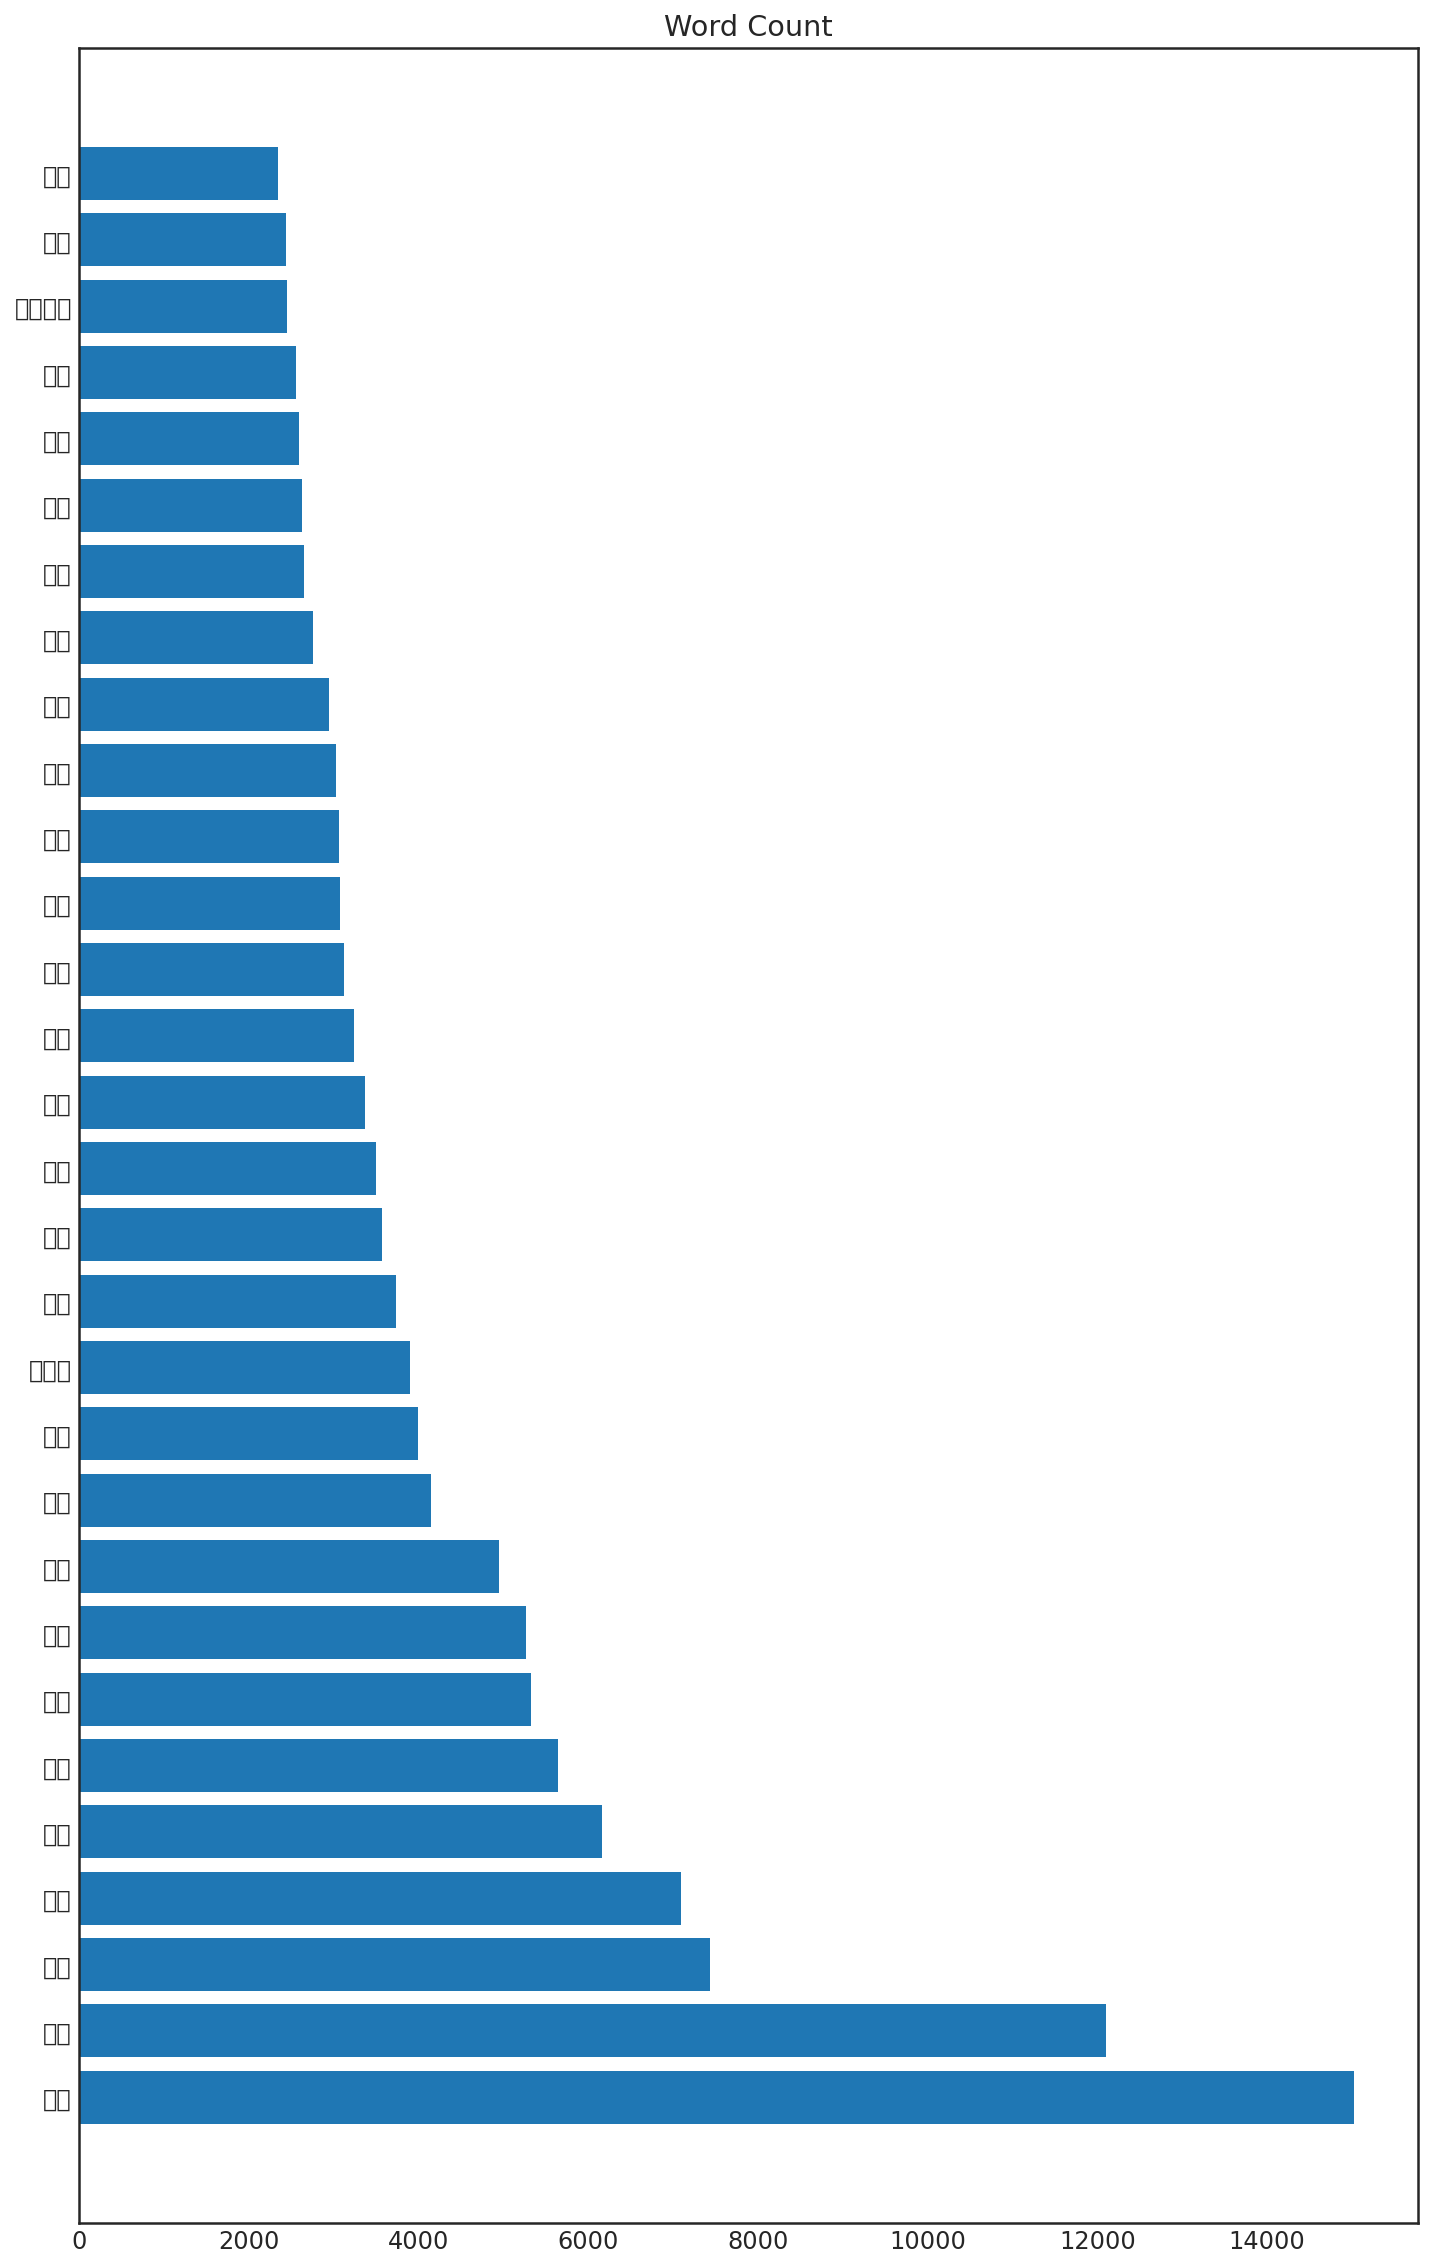

In [ ]:
top_morphs = dict(counter.most_common(30))

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_morphs))

plt.figure(figsize=(12, 20))
plt.barh(y_pos, top_morphs.values())
plt.title('Word Count')
plt.yticks(y_pos, top_morphs.keys())
plt.show()

##### 트리맵(Treemap) 시각화

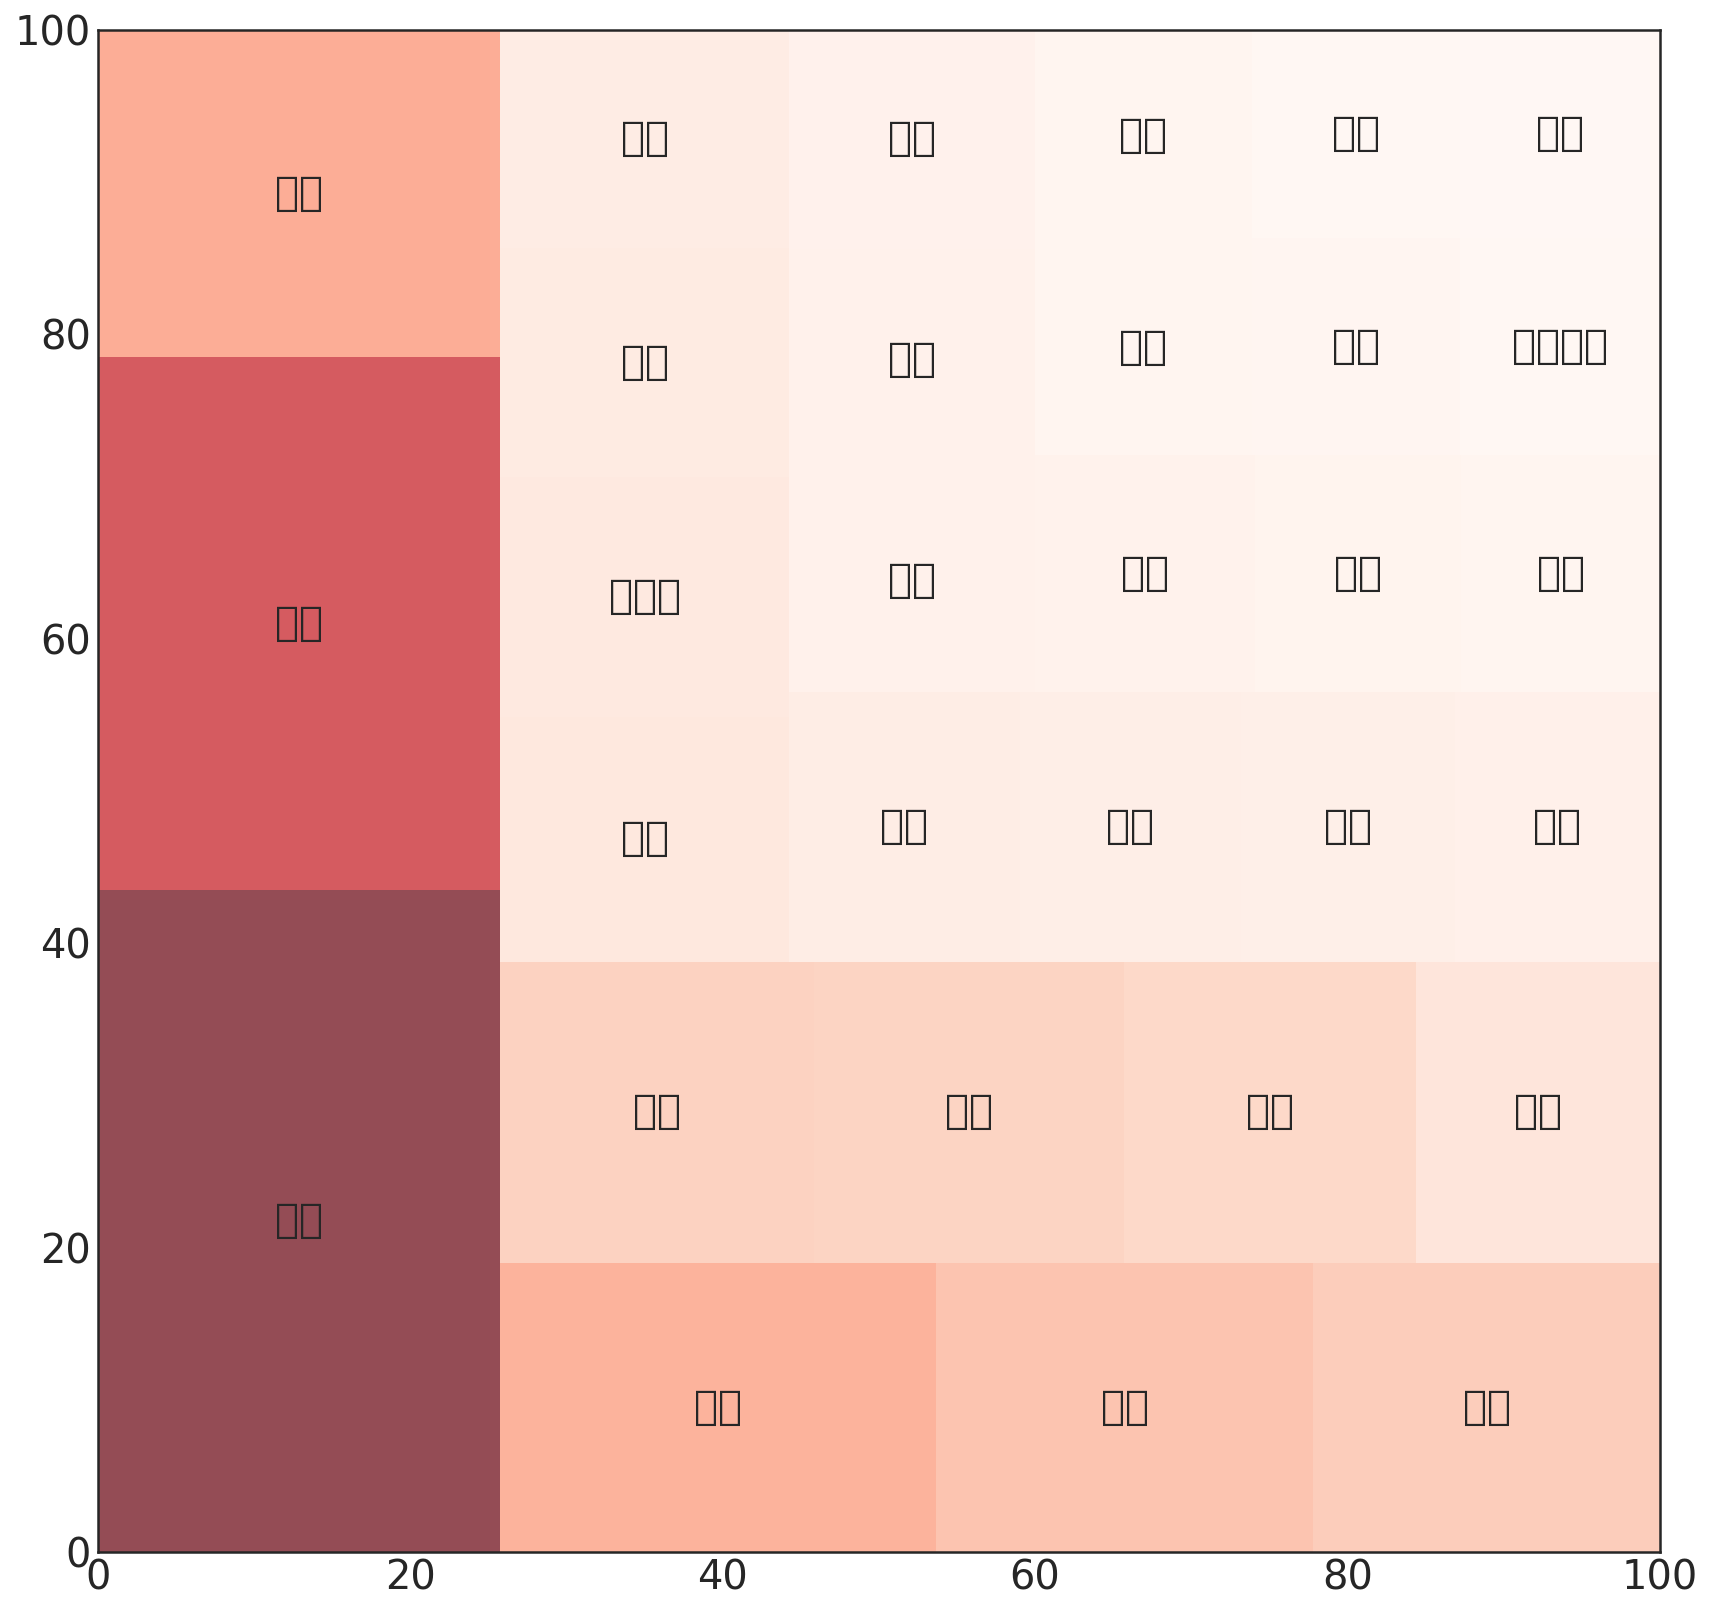

In [ ]:
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20


top_morphs_map = mpl.colors.Normalize(vmin=min(top_morphs.values()),
                            vmax=max(top_morphs.values()))
colors = [mpl.cm.Reds(top_morphs_map(value)) for value in top_morphs.values()]

squarify.plot(label=top_morphs.keys(),
              sizes=top_morphs.values(),
              color=colors,
              alpha=.7);

##### 워드클라우드(WordCloud) 시각화

<function matplotlib.pyplot.show(*args, **kw)>

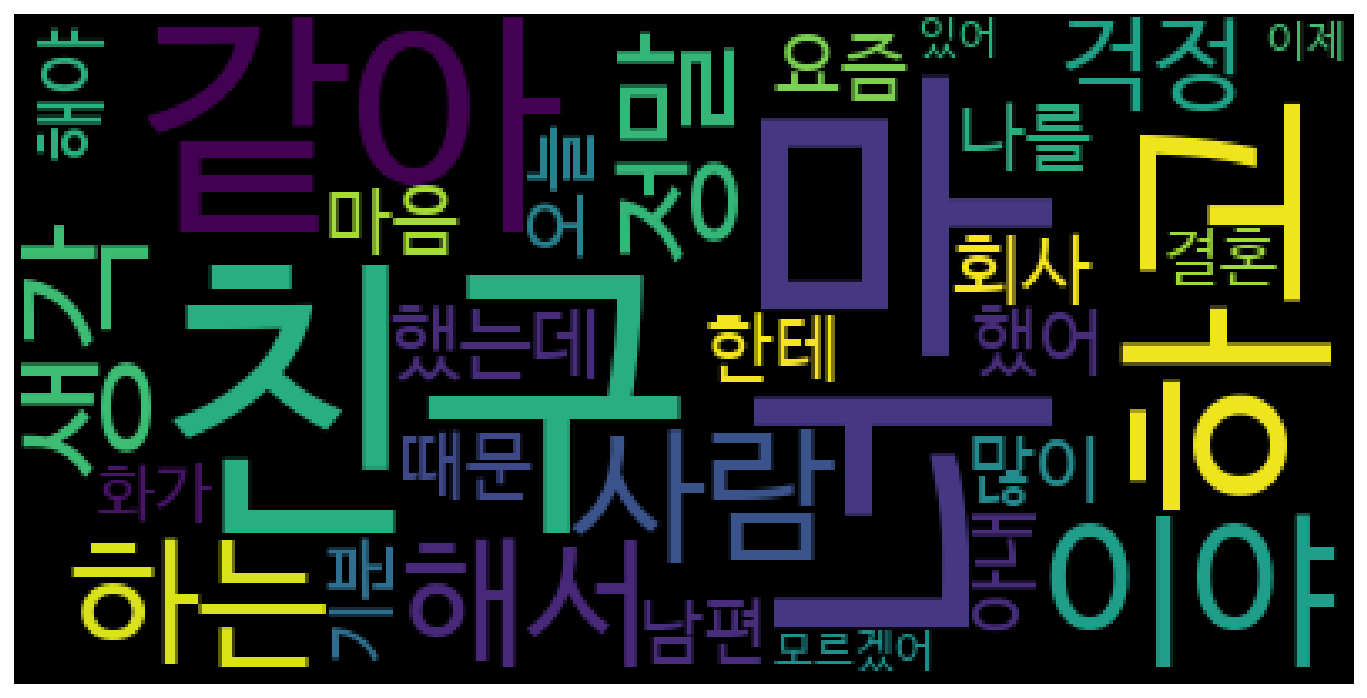

In [ ]:
wc = WordCloud(background_color='black', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_morphs)

figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show

##### TF-IDF 적용

In [ ]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)
print(tf_idf_vect.shape)

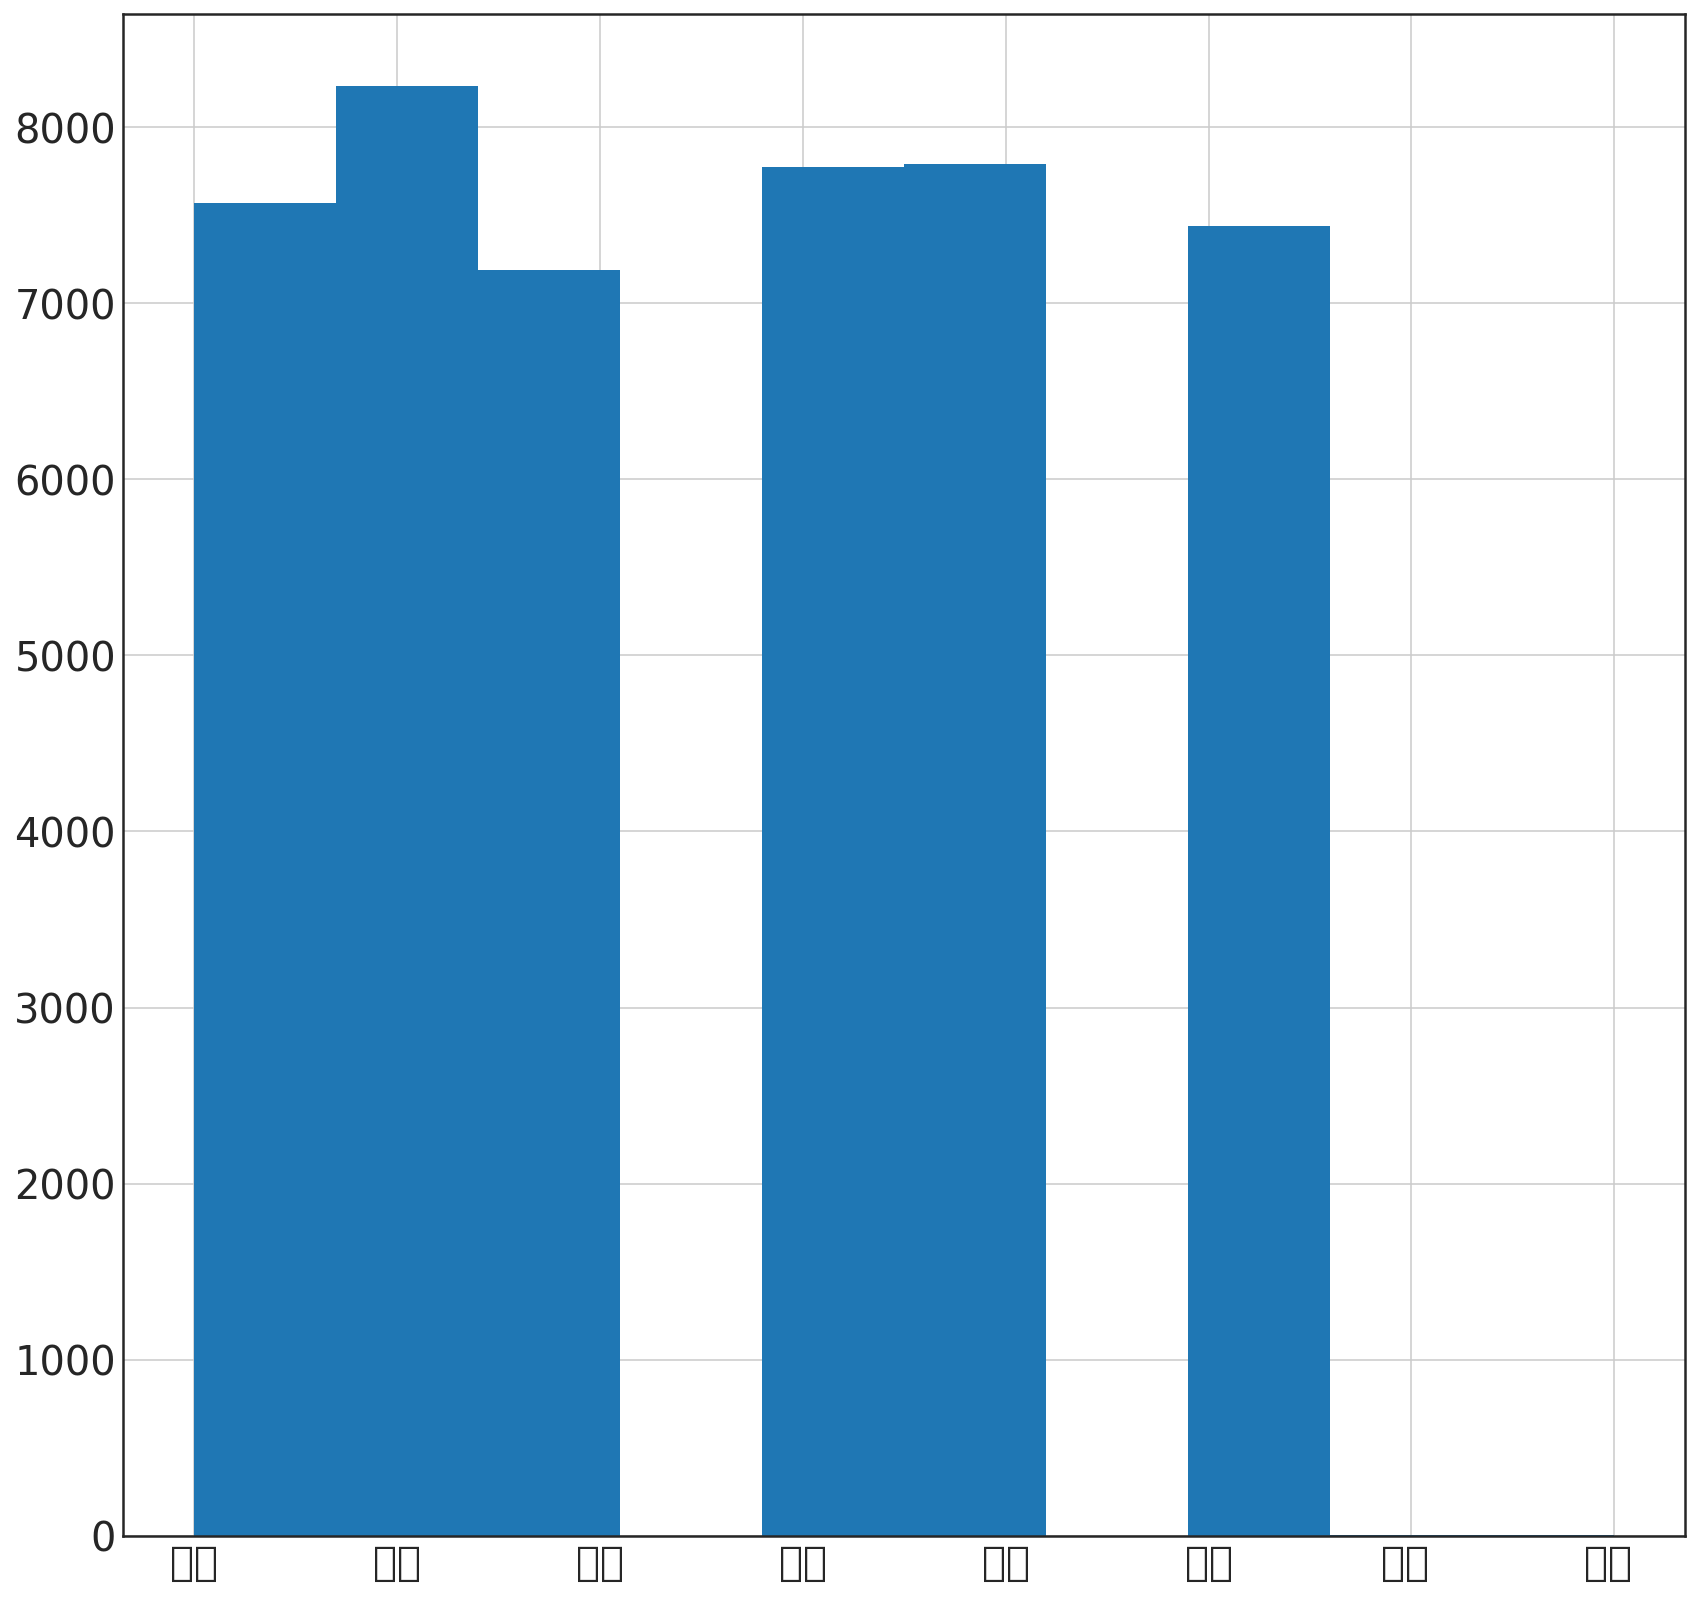

In [ ]:
df['감정_대분류'].hist()

In [ ]:
def label(감정_대분류):
    if 감정_대분류 == '기쁨':
        return 1
    else:
        return 0

df['y'] = df['감정_대분류'].apply(lambda x: label(x))
df["y"].value_counts()

##### Training set / Test set 나누기

In [ ]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

##### 모델 학습

In [ ]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [ ]:
print ('\n Here is the classification report:')
print (classification_report(y_test, y_pred))


 Here is the classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7654
           1       0.94      0.58      0.72      1548

    accuracy                           0.92      9202
   macro avg       0.93      0.79      0.84      9202
weighted avg       0.93      0.92      0.92      9202



In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.92
precision: 0.94
recall: 0.58
F1: 0.72


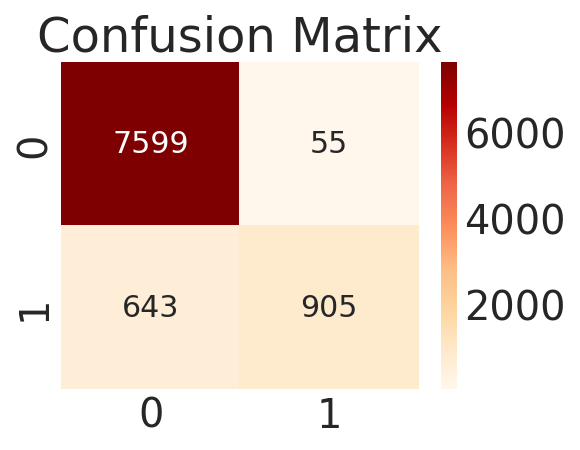

In [ ]:
# confusion matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

샘플링 재조정

In [ ]:
df['y'].value_counts()

0    38438
1     7571
Name: y, dtype: int64

In [ ]:
positive_random_idx = df[df['y']==1].sample(7571, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(7571, random_state=12).index.tolist()

In [ ]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape, y_train.shape

((12113, 40417), (12113,))

In [ ]:
x_test.shape, y_test.shape

((3029, 40417), (3029,))

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
print ('\n Here is the classification report:')
print (classification_report(y_test, y_pred))


 Here is the classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1547
           1       0.91      0.88      0.89      1482

    accuracy                           0.90      3029
   macro avg       0.90      0.90      0.90      3029
weighted avg       0.90      0.90      0.90      3029



In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.90
precision: 0.91
recall: 0.88
F1: 0.89


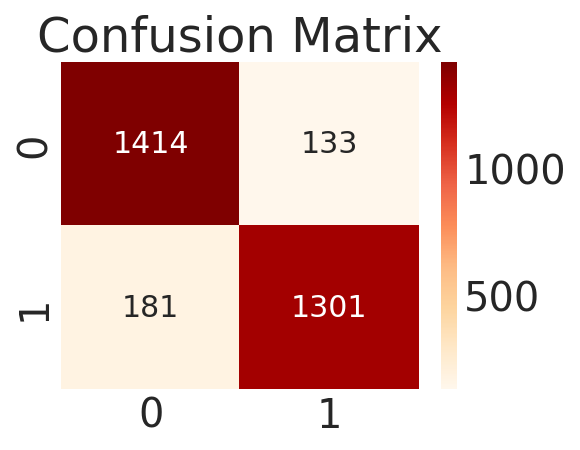

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

긍정 / 부정 키워드 분석

In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)

invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(invert_index_vectorizer)

{24328: '아내', 10570: '드디어', 35380: '출산', 37486: '하게', 10142: '되어서', 31676: '정말', 5361: '나아', 33284: '지금', 8649: '당뇨', 38195: '합병증', 11658: '때문', 13732: '먹어야', 605: '가지', 6697: '넘어가니까', 22376: '스트레스', 1512: '건강할', 2630: '관리', 37622: '하는', 20654: '생각', 12165: '라고', 2174: '고등학교', 27716: '올라오니', 33096: '중학교', 17308: '보다', 21957: '수업', 901: '갑자기', 26042: '어려워져서', 8811: '당황', 22198: '스러워', 24585: '아직', 37908: '학기', 29562: '인데', 11451: '따라갈', 30347: '있을지', 1435: '걱정', 35448: '취업', 9901: '돼서', 15985: '받게', 28664: '월급', 584: '가족', 28130: '외식', 27422: '예정', 29374: '이야', 6565: '너무', 39083: '행복해', 36452: '퇴직', 8168: '다시는', 25523: '알았는데', 29189: '이렇게', 13204: '맛있는', 30190: '있어서', 1224: '갚게', 29470: '이제야', 24808: '안도', 10862: '들어', 1272: '갚았으니', 8663: '당분간', 24486: '아무', 37718: '하며', 23526: '싶어', 29468: '이제', 28935: '은퇴', 22565: '시기', 10200: '되었어', 13833: '먼저', 37530: '하고', 1324: '개월', 6018: '남편', 37711: '하루', 32131: '종일', 30053: '있겠네', 38325: '해도', 12537: '막혀', 10482: '둘이서', 38430: '해본', 26590: '없거

In [ ]:
#긍정 키워드 리스트
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

기뻐 8.910081184616876
다행 8.723150042279482
드디어 5.286147829286815
행복해 4.672174051364974
고마워 4.3889701925020805
신뢰 4.129361402978849
덕분 3.8179454314355126
감사해 3.7850011714701806
만족스러워 3.748517655666027
흥분 3.6022336273915387
아주 3.42386499980315
편안해 3.284683352286792
안도 3.1731526288537903
느긋하게 3.086762744321441
편해 3.0254327462697823
정말 2.978139680995455
선물 2.9736960255244953
좋았어 2.938874116349701
있을 2.932244862341633
안심 2.81273831584716


In [ ]:
#부정 키워드 리스트
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

화가 -5.388812886171839
슬퍼 -4.939062629900711
당황 -4.830324395914519
속상해 -4.549379780242755
불안해 -4.336959334907429
힘들어 -4.099169115316451
상처 -3.8531324843670522
모르겠어 -3.700395343195824
후회 -3.540627151965822
스러워 -3.508789673710193
짜증 -3.20653202626955
자꾸 -3.1983948485464553
충격 -3.1956153009814394
갑자기 -2.8578861473329726
실망 -2.8313185070095335
두려워 -2.778457261406144
우울해 -2.758325303986438
혼란 -2.7523748220172815
해야 -2.748698596929924
배신 -2.7164493481483536


연령별 키워드

In [ ]:
is_ad = df['연령'] == '청소년'
df_ad = df[is_ad]

is_yo = df['연령'] == '청년'
df_yo = df[is_yo]

is_mi = df['연령'] == '중년'
df_mi = df[is_mi]

is_ol = df['연령'] == '노년'
df_ol = df[is_ol]

df["연령"].value_counts()

청년     14055
중년     12207
노년     11474
청소년     8273
Name: 연령, dtype: int64

##### 빈도 탐색(청소년)

In [ ]:
corpus_ad = " ".join(df_ad['사람문장'].tolist())
counter_ad = text_cleaning(corpus_ad)

counter_ad = Counter(counter_ad)
counter_ad.most_common(10)

[('친구', 3785),
 ('너무', 3144),
 ('엄마', 1437),
 ('같아', 1330),
 ('공부', 1270),
 ('학교', 1243),
 ('부모님', 1178),
 ('하고', 1159),
 ('나를', 1141),
 ('한테', 1018)]

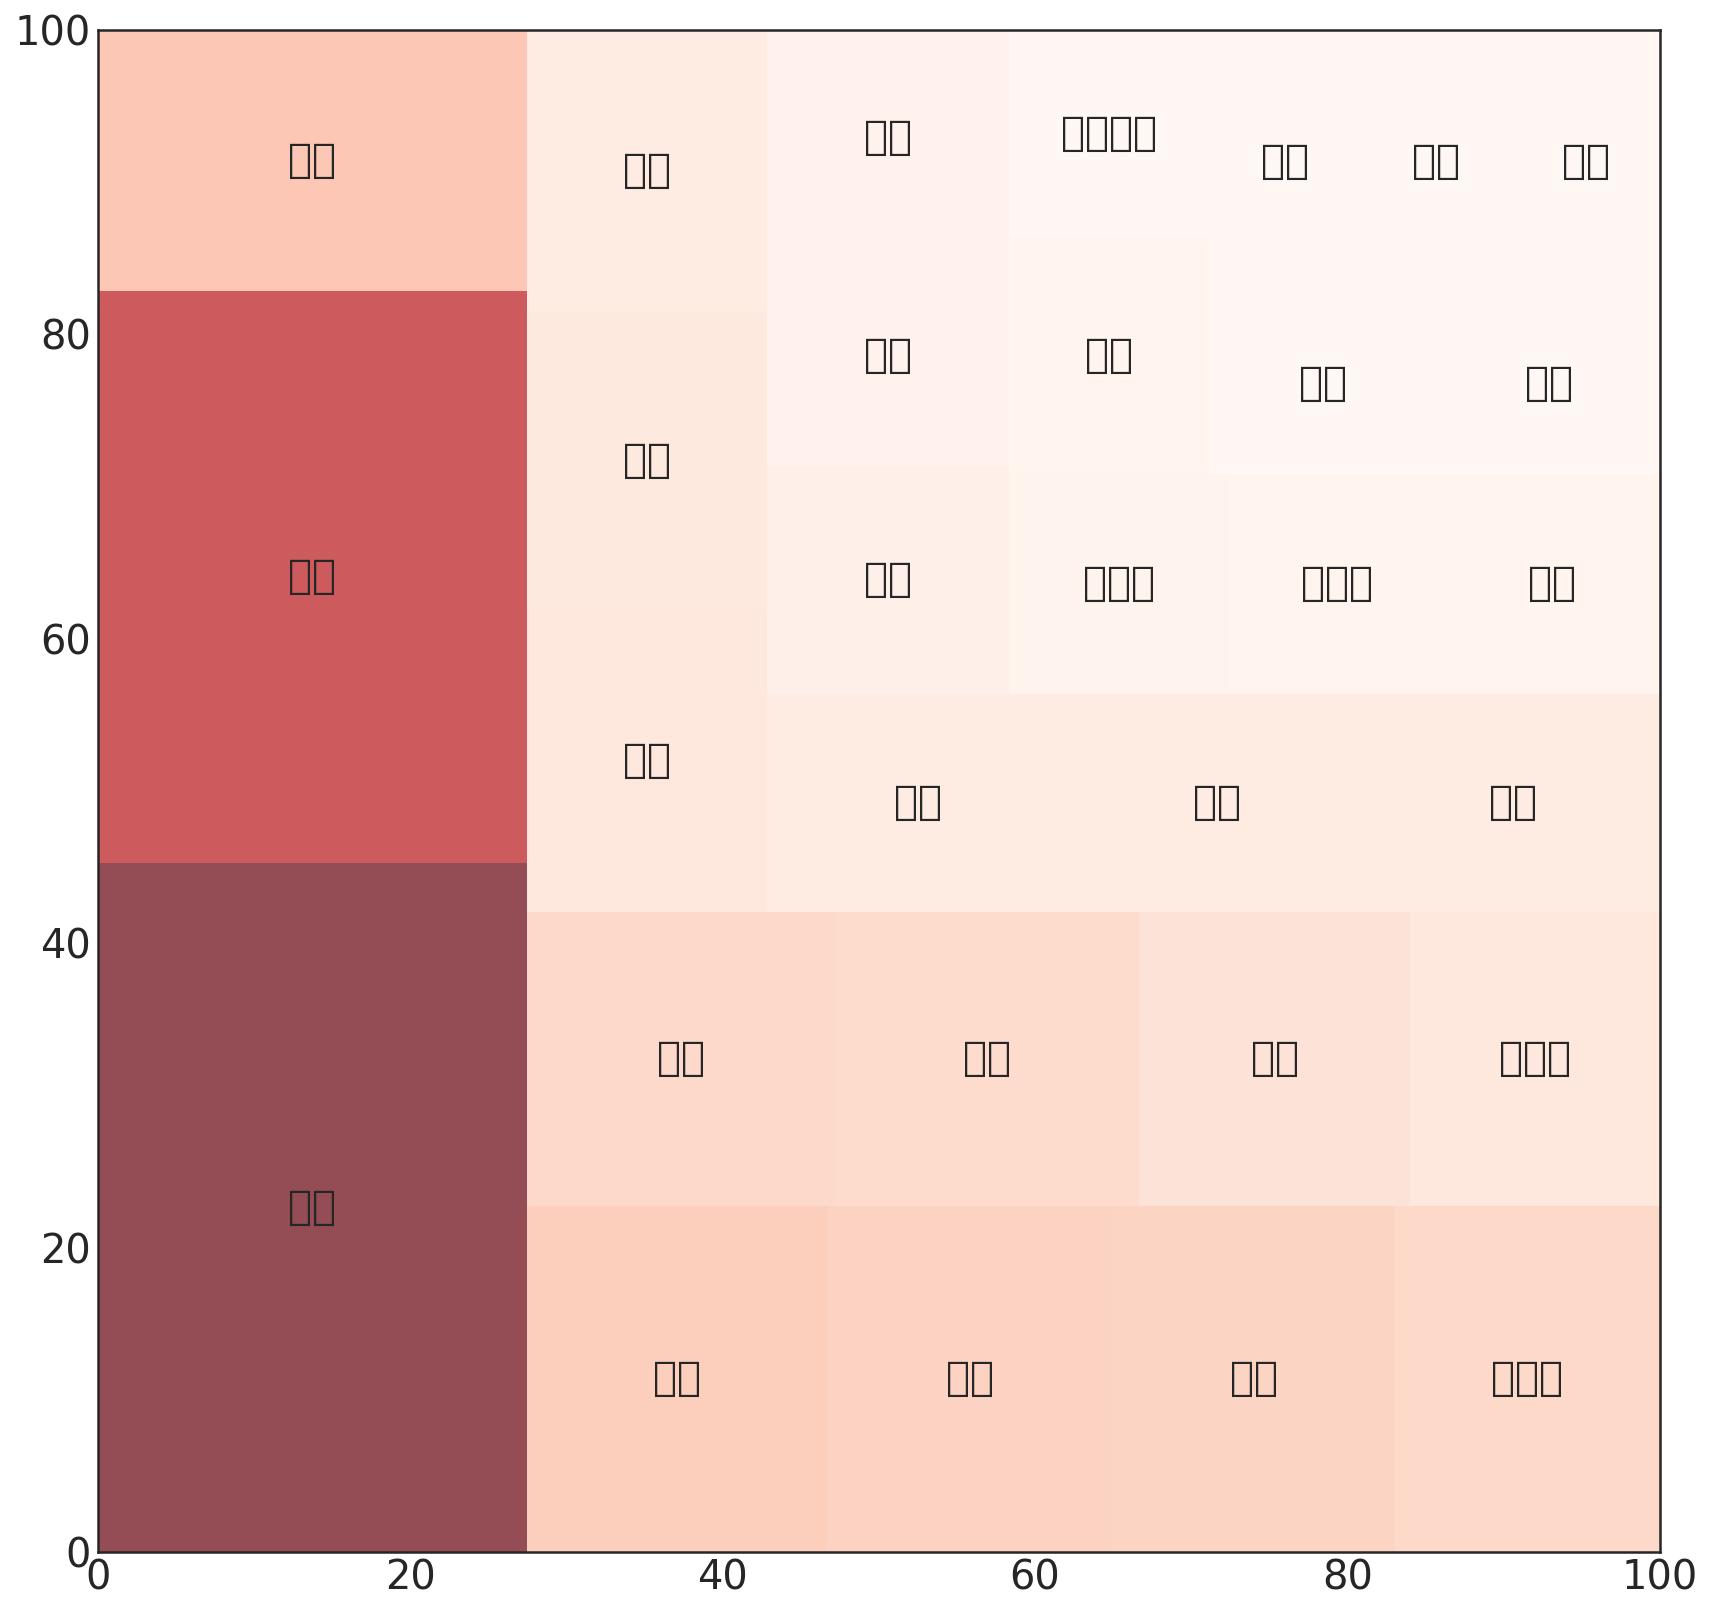

In [ ]:
top_morphs_ad = dict(counter_ad.most_common(30))
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20
norm_ad = mpl.colors.Normalize(vmin=min(top_morphs_ad.values()),
                            vmax=max(top_morphs_ad.values()))
colors = [mpl.cm.Reds(norm_ad(value)) for value in top_morphs_ad.values()]
squarify.plot(label=top_morphs_ad.keys(),
              sizes=top_morphs_ad.values(),
              color=colors,
              alpha=.7);

##### 빈도 탐색(청년)

In [ ]:
corpus_yo = " ".join(df_yo['사람문장'].tolist())
counter_yo = text_cleaning(corpus_yo)

counter_yo = Counter(counter_yo)
counter_yo.most_common(10)

[('친구', 5074),
 ('너무', 5052),
 ('같아', 2600),
 ('사람', 2491),
 ('하고', 2478),
 ('결혼', 2192),
 ('하는', 2005),
 ('회사', 1997),
 ('이야', 1789),
 ('생각', 1644)]

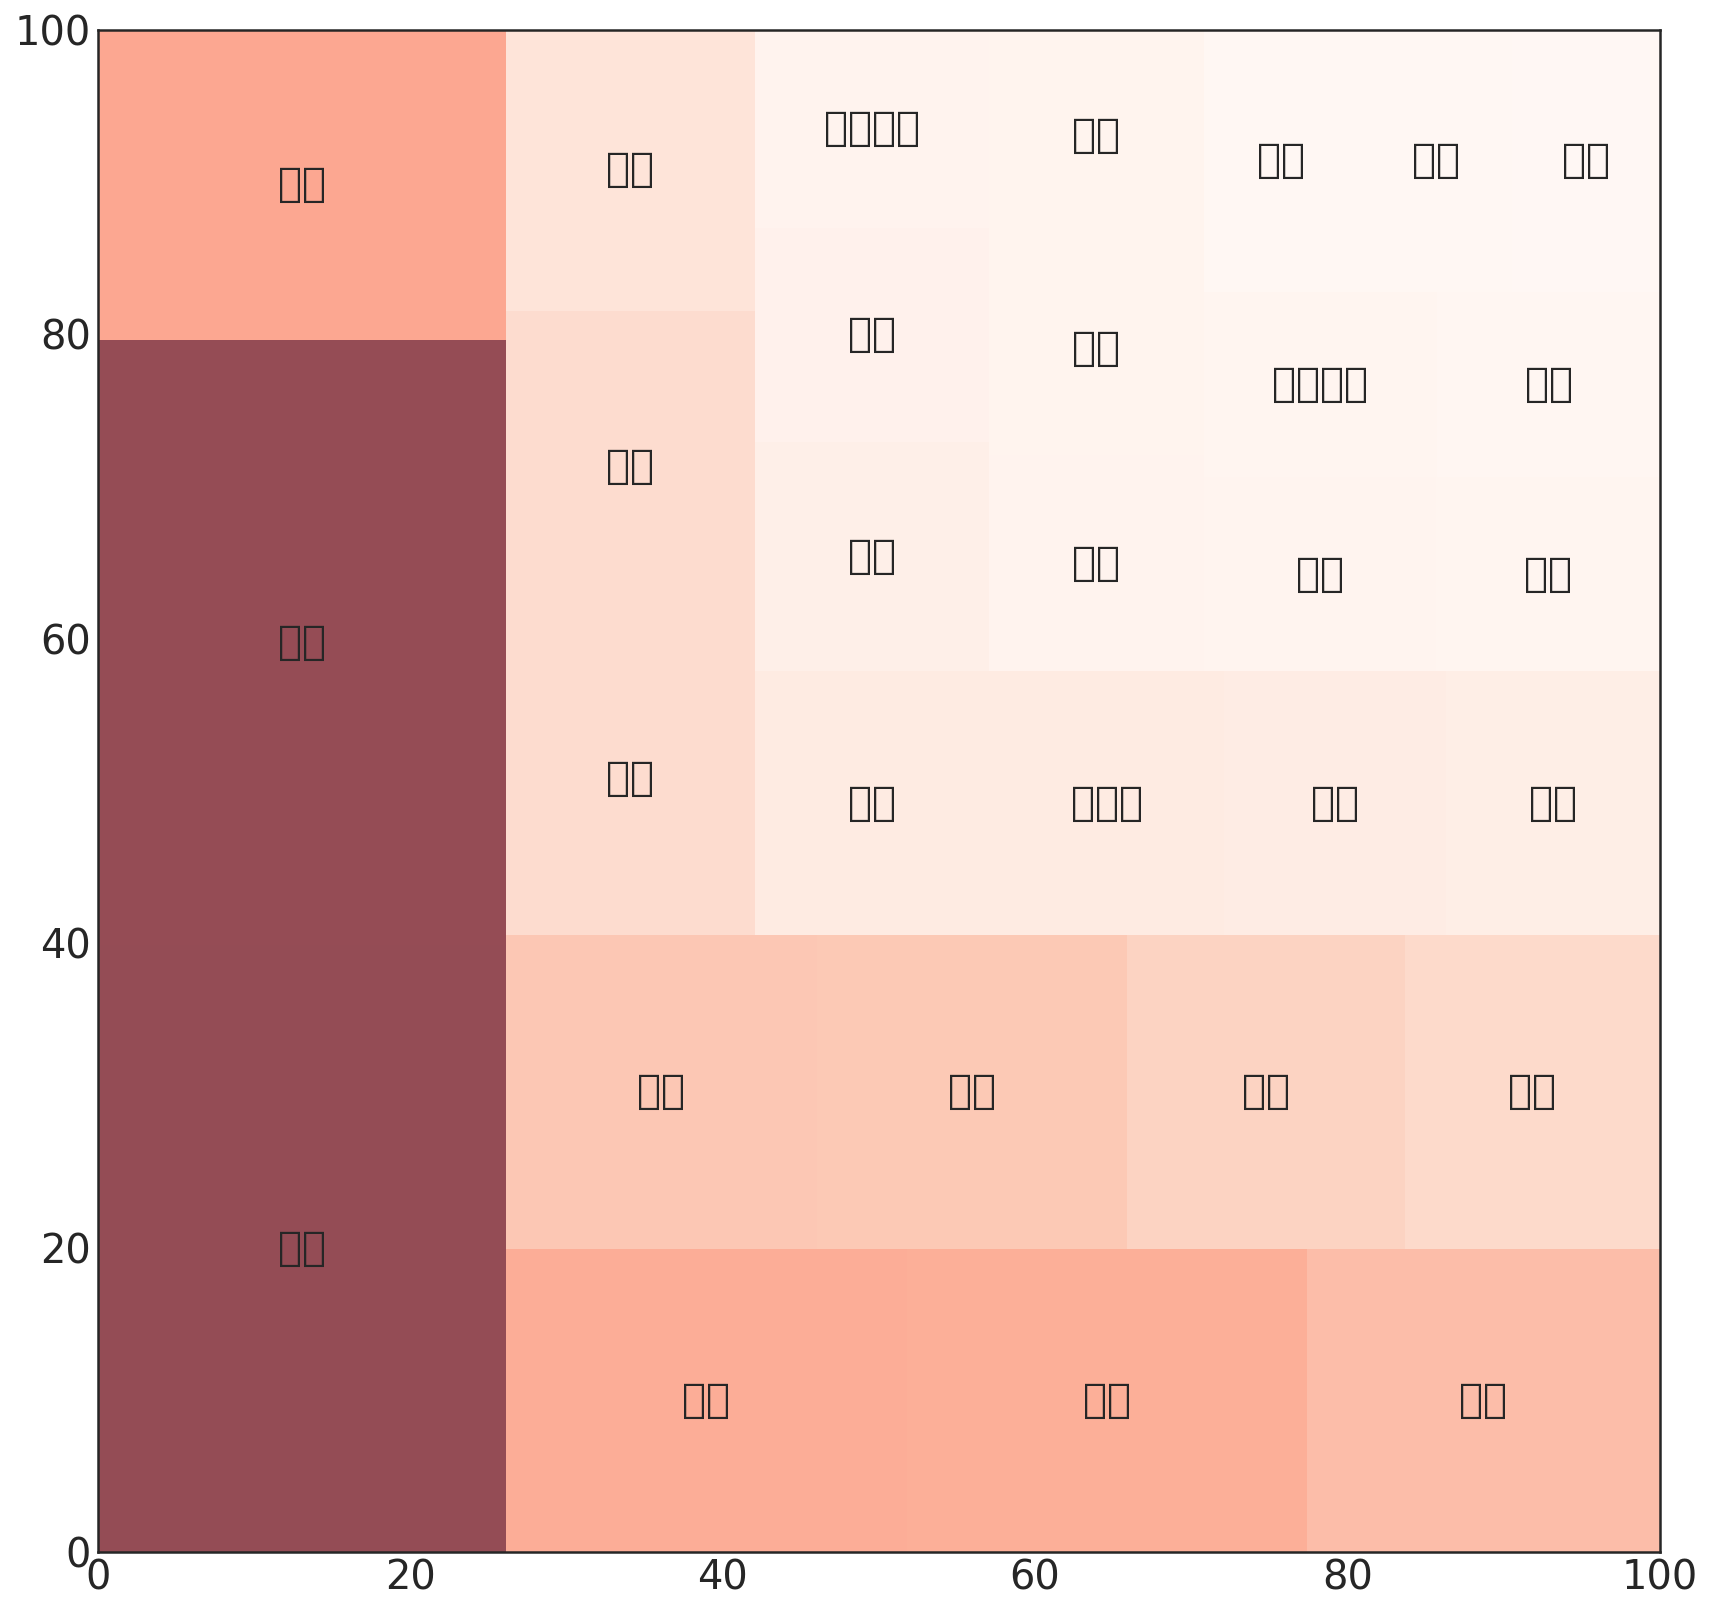

In [ ]:
top_morphs_yo = dict(counter_yo.most_common(30))
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20
norm_yo = mpl.colors.Normalize(vmin=min(top_morphs_yo.values()),
                            vmax=max(top_morphs_yo.values()))
colors = [mpl.cm.Reds(norm_yo(value)) for value in top_morphs_yo.values()]
squarify.plot(label=top_morphs_yo.keys(),
              sizes=top_morphs_yo.values(),
              color=colors,
              alpha=.7);

##### 빈도 탐색(중년)

In [ ]:
corpus_mi = " ".join(df_mi['사람문장'].tolist())
counter_mi = text_cleaning(corpus_mi)

counter_mi = Counter(counter_mi)
counter_mi.most_common(10)

[('너무', 3624),
 ('하고', 2082),
 ('같아', 2036),
 ('이야', 1951),
 ('남편', 1558),
 ('회사', 1551),
 ('걱정', 1434),
 ('생각', 1431),
 ('해서', 1392),
 ('하는', 1377)]

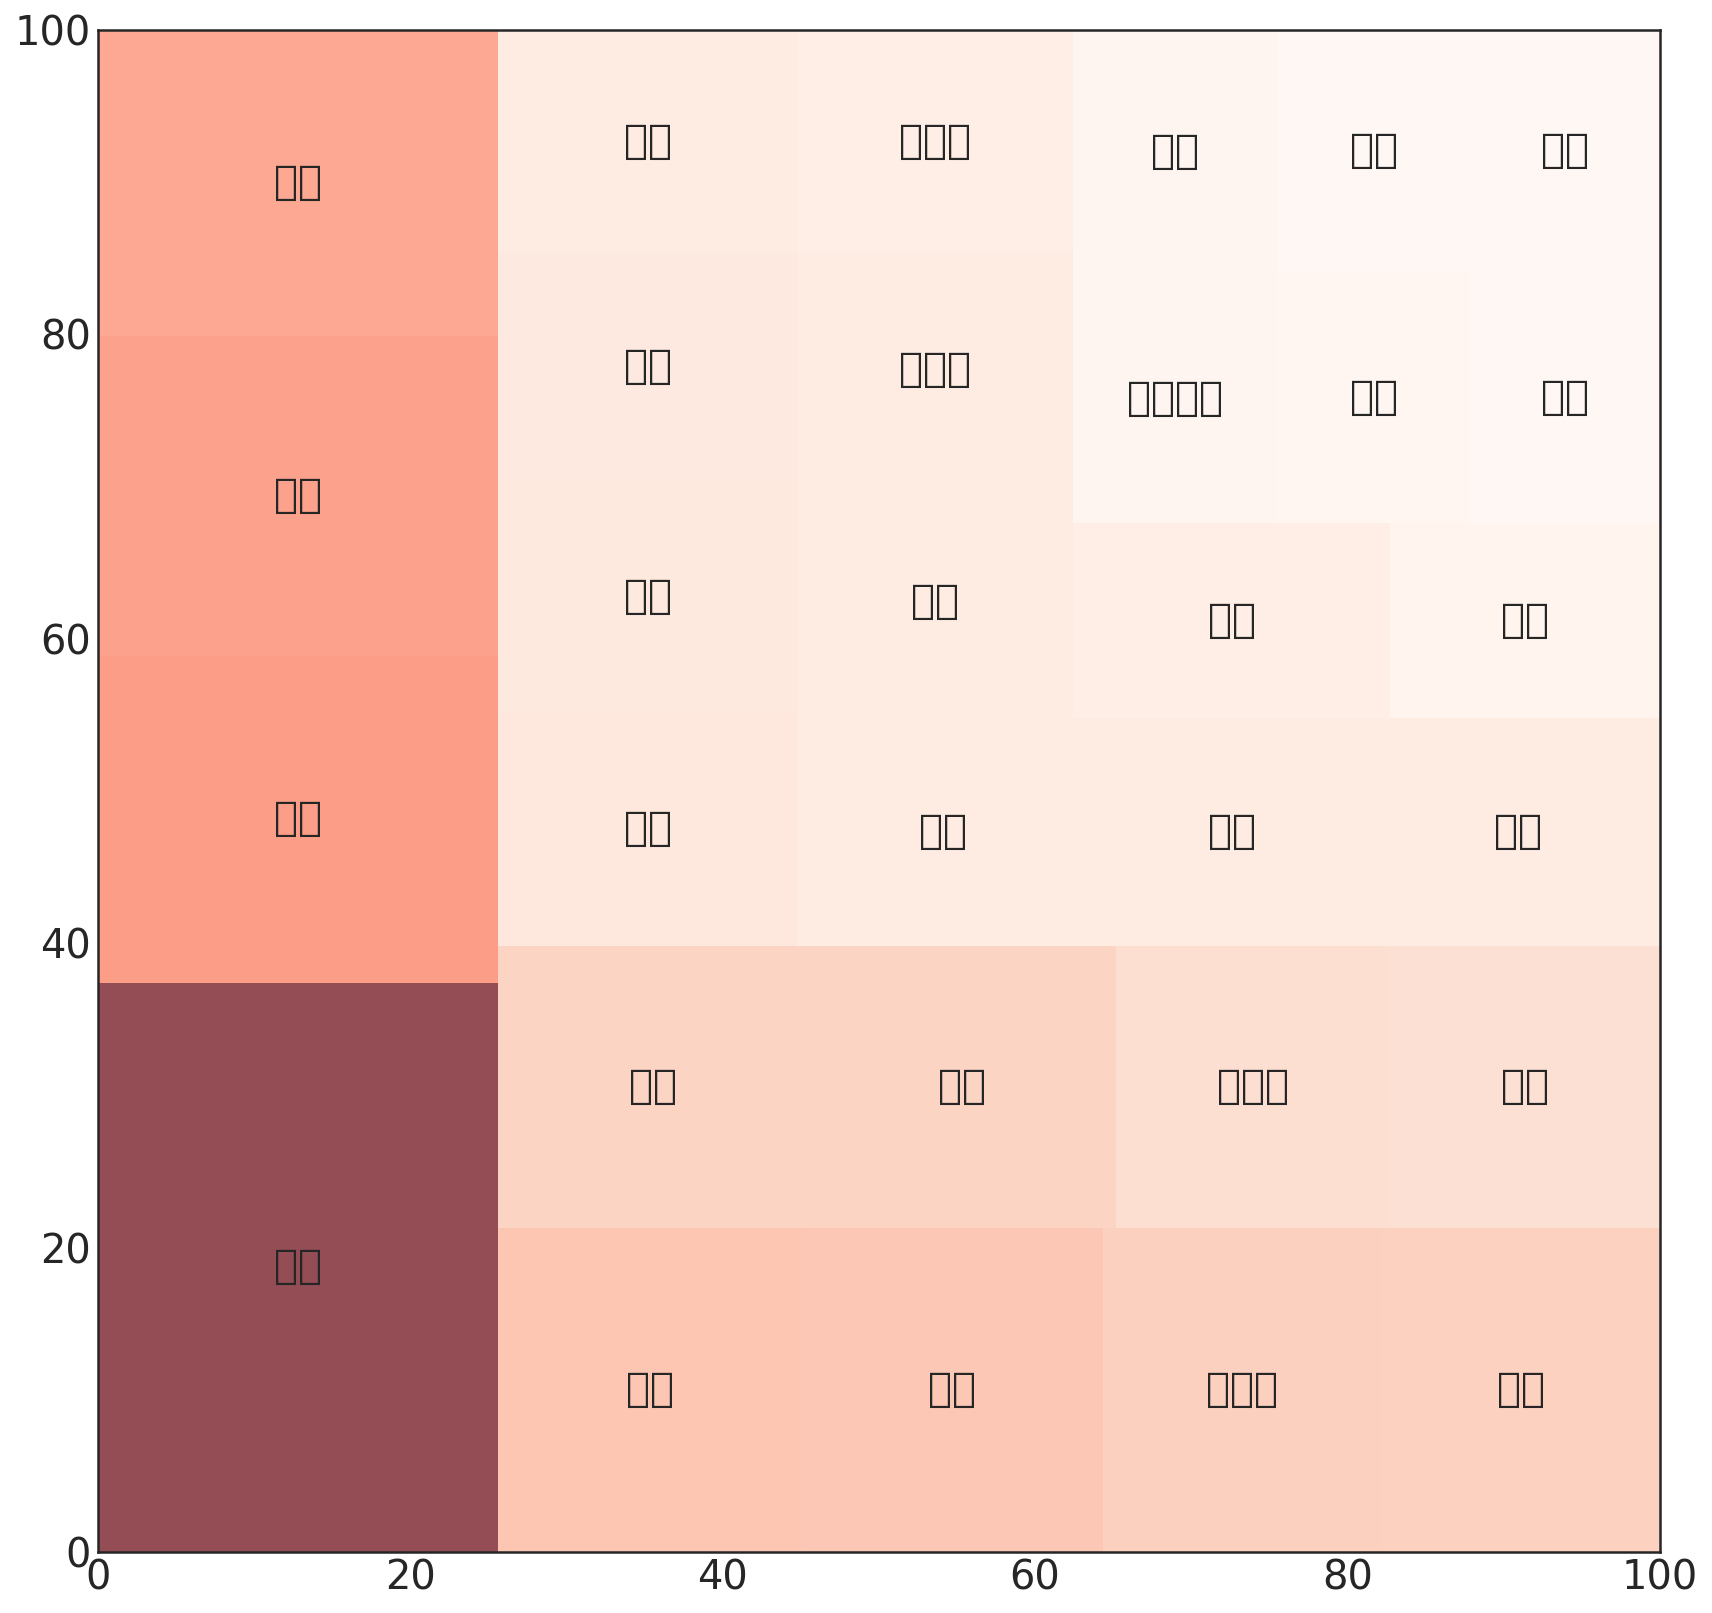

In [ ]:
top_morphs_mi = dict(counter_mi.most_common(30))
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20
norm_mi = mpl.colors.Normalize(vmin=min(top_morphs_mi.values()),
                            vmax=max(top_morphs_mi.values()))
colors = [mpl.cm.Reds(norm_mi(value)) for value in top_morphs_mi.values()]
squarify.plot(label=top_morphs_ad.keys(),
              sizes=top_morphs_mi.values(),
              color=colors,
              alpha=.7);

##### 빈도 탐색(노년)

In [ ]:
corpus_ol = " ".join(df_ol['사람문장'].tolist())
counter_ol = text_cleaning(corpus_ol)

counter_ol = Counter(counter_ol)
counter_ol.most_common(10)

[('너무', 3209),
 ('친구', 2218),
 ('사람', 1838),
 ('이야', 1592),
 ('같아', 1468),
 ('자식', 1403),
 ('하고', 1379),
 ('생각', 1365),
 ('병원', 1239),
 ('걱정', 1221)]

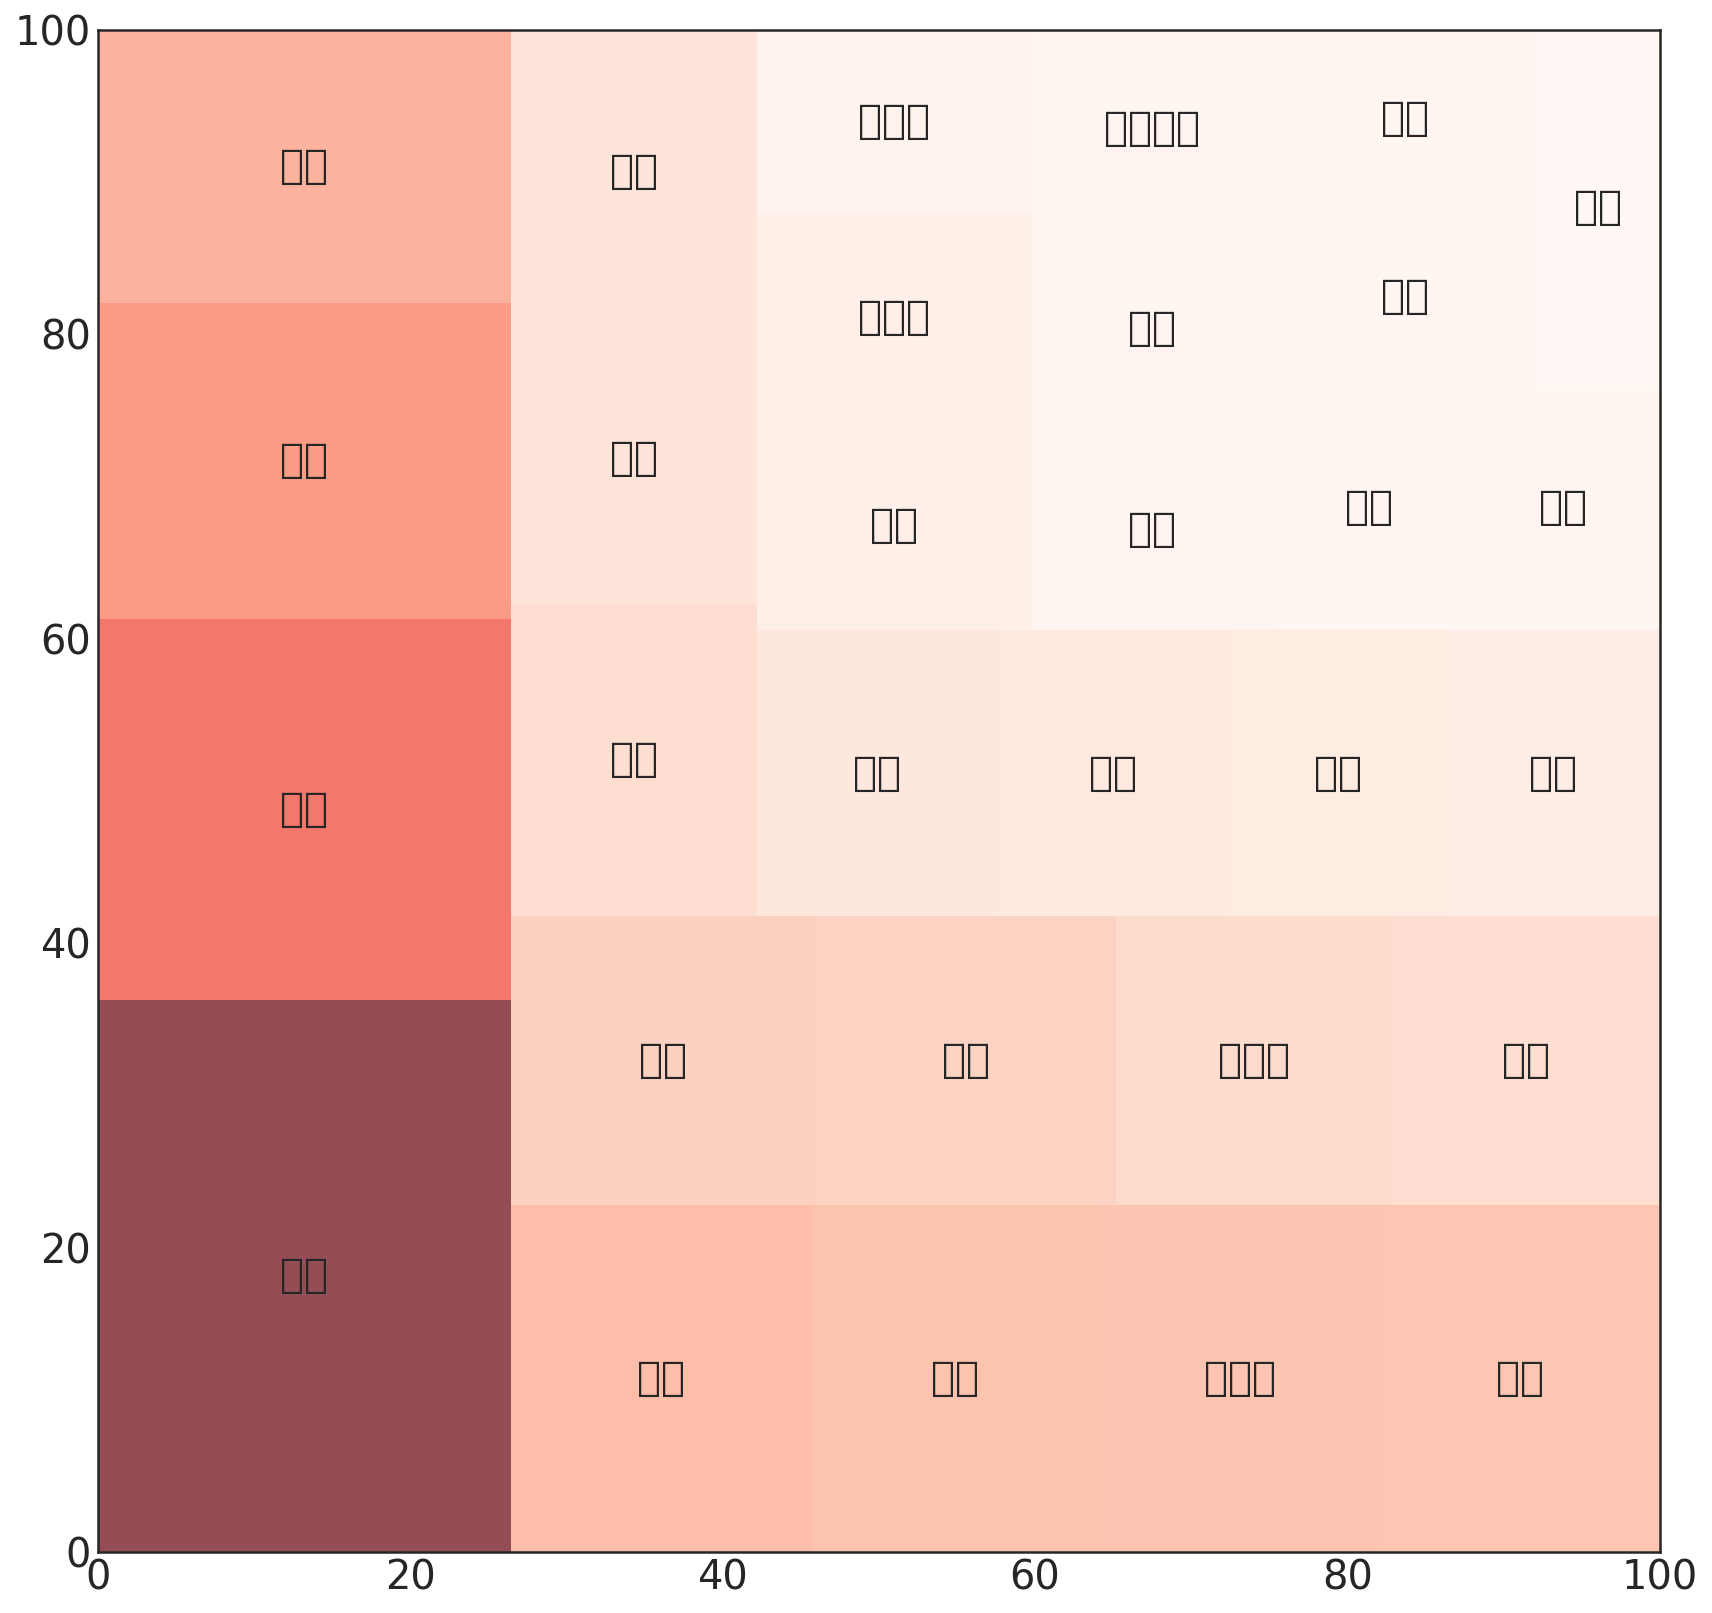

In [ ]:
top_morphs_ol = dict(counter_ol.most_common(30))
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20
norm_ol = mpl.colors.Normalize(vmin=min(top_morphs_ol.values()),
                            vmax=max(top_morphs_ol.values()))
colors = [mpl.cm.Reds(norm_ol(value)) for value in top_morphs_ol.values()]
squarify.plot(label=top_morphs_ad.keys(),
              sizes=top_morphs_ol.values(),
              color=colors,
              alpha=.7);

연령별 부정(우울) 키워드

청소년  

In [ ]:
df_ad_de = df_ad[df_ad['y']==0]
corpus_ad_de = " ".join(df_ad_de['사람문장'].tolist())
counter_ad_de = text_cleaning(corpus_ad_de)

# 빈도 탐색(우울)
counter_ad_de = Counter(counter_ad_de)
counter_ad_de.most_common(10)

[('친구', 3290),
 ('너무', 2753),
 ('엄마', 1248),
 ('같아', 1155),
 ('공부', 1117),
 ('학교', 1055),
 ('부모님', 1005),
 ('하고', 1005),
 ('나를', 978),
 ('한테', 924)]

<function matplotlib.pyplot.show(*args, **kw)>

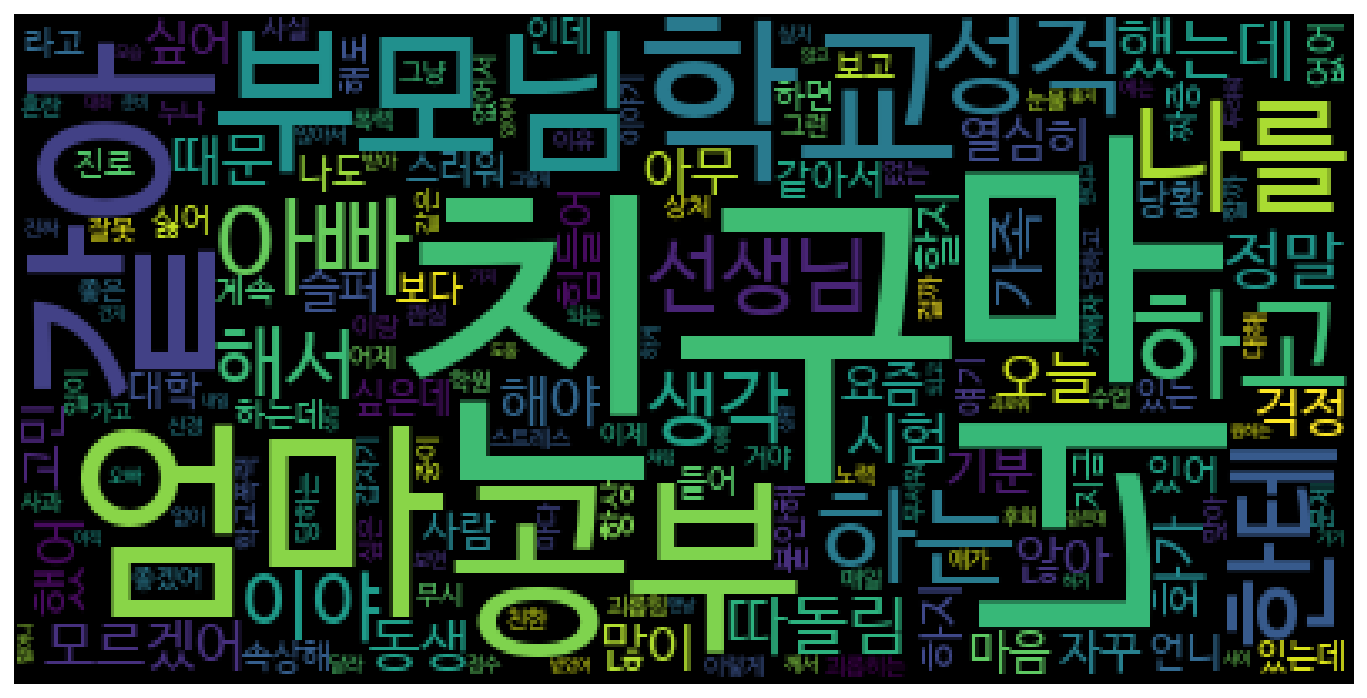

In [ ]:
wc.generate_from_frequencies(counter_ad_de)
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show

청년

In [ ]:
df_yo_de = df_yo[df_yo['y']==0]
corpus_yo_de = " ".join(df_yo_de['사람문장'].tolist())
counter_yo_de = text_cleaning(corpus_yo_de)

# 빈도 탐색(우울)
counter_yo_de = Counter(counter_yo_de)
counter_yo_de.most_common(10)

[('친구', 4345),
 ('너무', 4255),
 ('하고', 2121),
 ('사람', 2112),
 ('같아', 2089),
 ('결혼', 1872),
 ('하는', 1801),
 ('회사', 1634),
 ('이야', 1486),
 ('생각', 1423)]

<function matplotlib.pyplot.show(*args, **kw)>

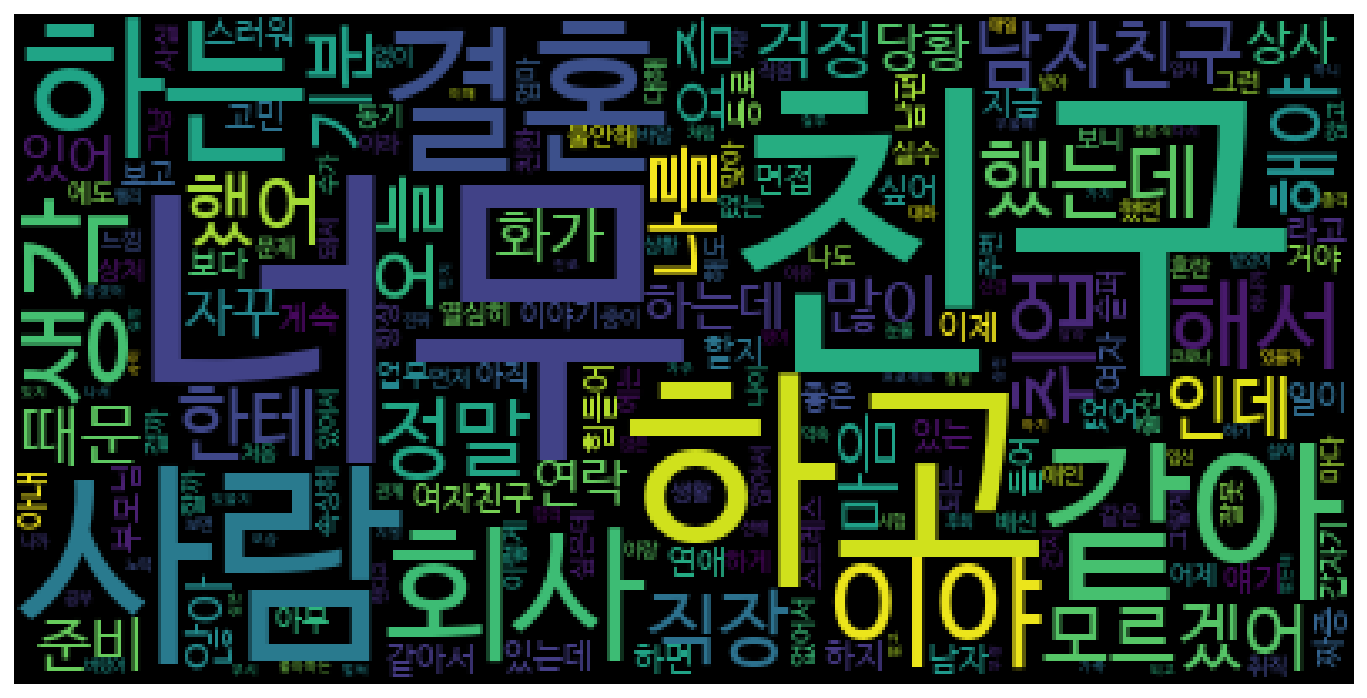

In [ ]:
wc.generate_from_frequencies(counter_yo_de)
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show

중년

In [ ]:
df_mi_de = df_mi[df_mi['y']==0]
corpus_mi_de = " ".join(df_mi_de['사람문장'].tolist())
counter_mi_de = text_cleaning(corpus_mi_de)

# 빈도 탐색(우울)
counter_mi_de = Counter(counter_mi_de)
counter_mi_de.most_common(10)

[('너무', 3090),
 ('하고', 1716),
 ('같아', 1683),
 ('이야', 1566),
 ('남편', 1337),
 ('회사', 1283),
 ('생각', 1209),
 ('하는', 1188),
 ('걱정', 1180),
 ('해서', 1137)]

<function matplotlib.pyplot.show(*args, **kw)>

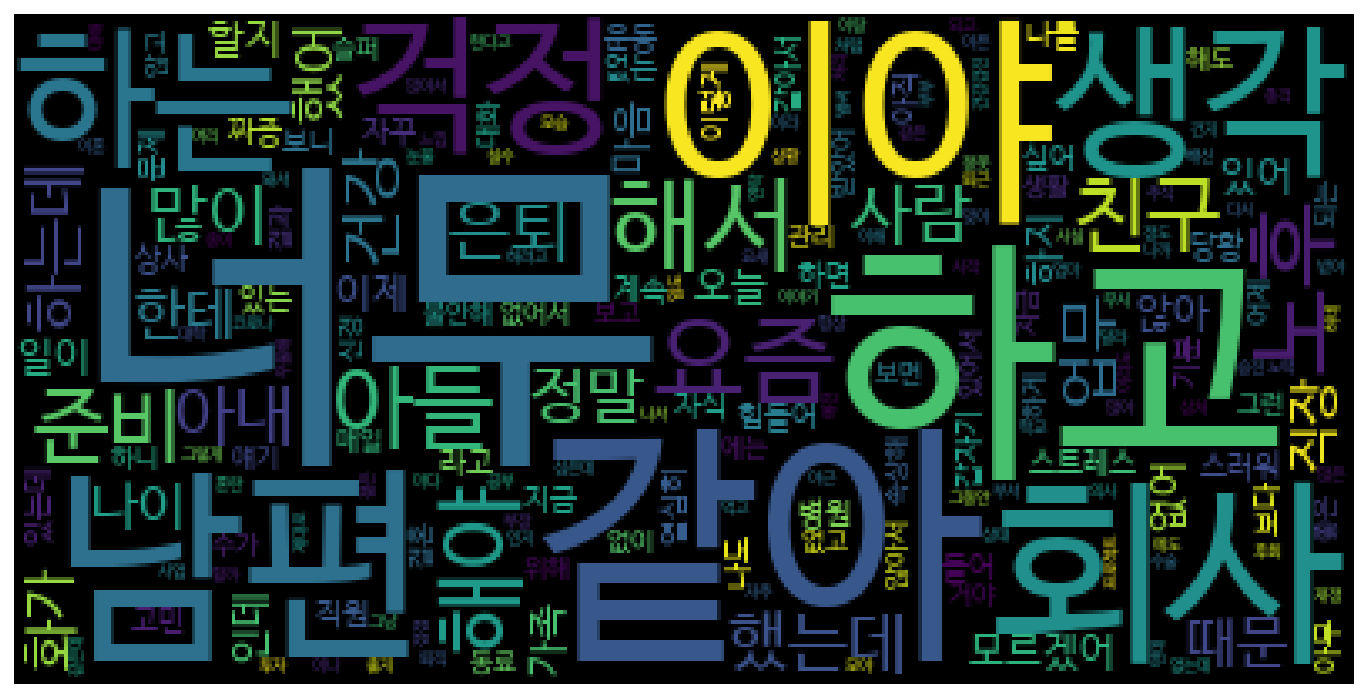

In [ ]:
wc.generate_from_frequencies(counter_mi_de)
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show

노년

In [ ]:
df_ol_de = df_ol[df_ol['y']==0]
corpus_ol_de = " ".join(df_ol_de['사람문장'].tolist())
counter_ol_de = text_cleaning(corpus_ol_de)

# 빈도 탐색(우울)
counter_ol_de = Counter(counter_ol_de)
counter_ol_de.most_common(10)

[('너무', 2767),
 ('친구', 1911),
 ('사람', 1566),
 ('자식', 1257),
 ('같아', 1244),
 ('이야', 1229),
 ('생각', 1173),
 ('하고', 1095),
 ('병원', 1026),
 ('걱정', 960)]

<function matplotlib.pyplot.show(*args, **kw)>

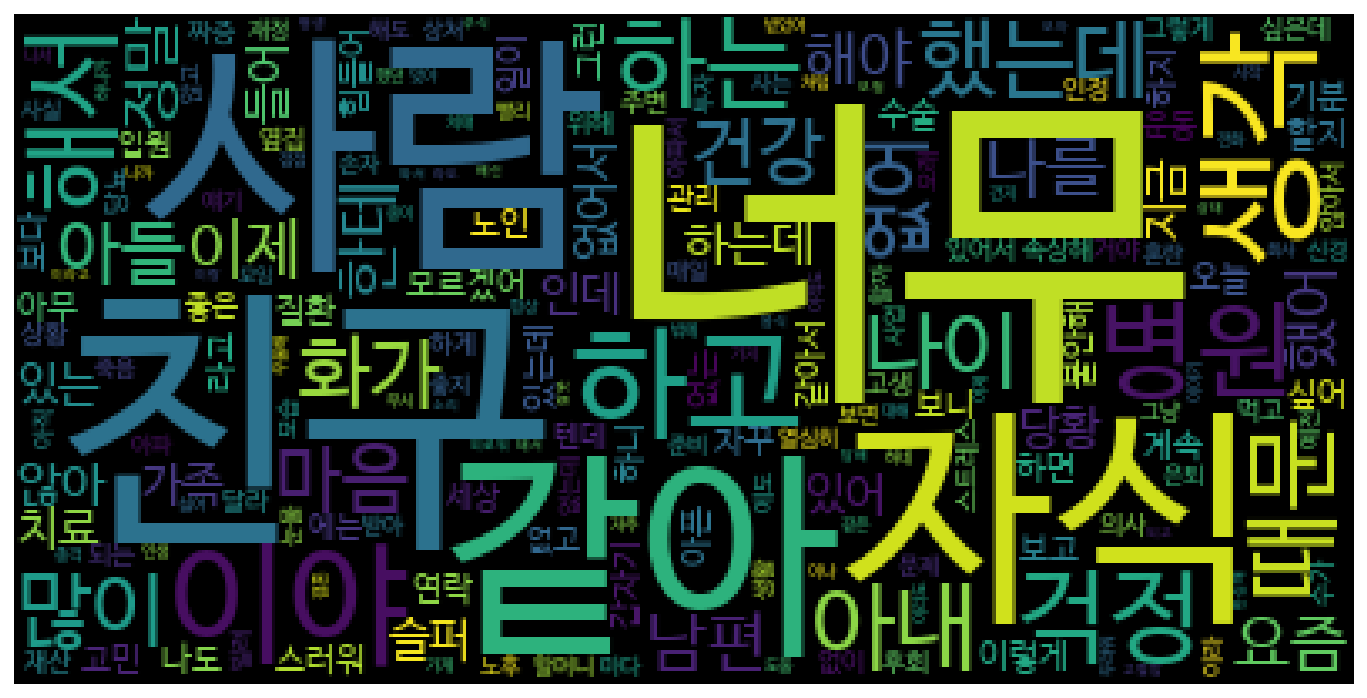

In [ ]:
wc.generate_from_frequencies(counter_ol_de)
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show

##### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB().fit(x_train, y_train)
y_predNB = NB.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_predNB))
print('precision: %.2f' % precision_score(y_test, y_predNB))
print('recall: %.2f' % recall_score(y_test, y_predNB))
print('F1: %.2f' % f1_score(y_test, y_predNB))

accuracy: 0.91
precision: 0.89
recall: 0.92
F1: 0.91


In [ ]:
print (classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1547
           1       0.89      0.92      0.91      1482

    accuracy                           0.91      3029
   macro avg       0.91      0.91      0.91      3029
weighted avg       0.91      0.91      0.91      3029



##### Decision tree

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier().fit(x_train.toarray(), y_train)
y_predDT = DT.predict(x_test.toarray())

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_predDT))
print('precision: %.2f' % precision_score(y_test, y_predDT))
print('recall: %.2f' % recall_score(y_test, y_predDT))
print('F1: %.2f' % f1_score(y_test, y_predDT))

accuracy: 0.76
precision: 0.75
recall: 0.78
F1: 0.77


In [ ]:
print (classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1547
           1       0.75      0.78      0.77      1482

    accuracy                           0.76      3029
   macro avg       0.77      0.77      0.76      3029
weighted avg       0.77      0.76      0.76      3029



##### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFA = RandomForestClassifier(n_estimators=10)
RFA.fit(x_train, y_train)
y_predRFA = RFA.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_predRFA))
print('precision: %.2f' % precision_score(y_test, y_predRFA))
print('recall: %.2f' % recall_score(y_test, y_predRFA))
print('F1: %.2f' % f1_score(y_test, y_predRFA))

accuracy: 0.85
precision: 0.87
recall: 0.82
F1: 0.84


In [ ]:
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predRFA))


 Here is the classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1547
           1       0.87      0.82      0.84      1482

    accuracy                           0.85      3029
   macro avg       0.85      0.85      0.85      3029
weighted avg       0.85      0.85      0.85      3029



##### SVM

In [ ]:
from sklearn.svm import LinearSVC
SVM = LinearSVC().fit(x_train, y_train)
y_predSVM = SVM.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_predSVM))
print('precision: %.2f' % precision_score(y_test, y_predSVM))
print('recall: %.2f' % recall_score(y_test, y_predSVM))
print('F1: %.2f' % f1_score(y_test, y_predSVM))

accuracy: 0.90
precision: 0.90
recall: 0.89
F1: 0.90


In [ ]:
print (classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1547
           1       0.90      0.89      0.90      1482

    accuracy                           0.90      3029
   macro avg       0.90      0.90      0.90      3029
weighted avg       0.90      0.90      0.90      3029



##### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier().fit(x_train, y_train)
y_predSGD = SGD.predict(x_test)

In [ ]:
print (classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1547
           1       0.90      0.89      0.90      1482

    accuracy                           0.90      3029
   macro avg       0.90      0.90      0.90      3029
weighted avg       0.90      0.90      0.90      3029



##### XGBoost

In [ ]:
from xgboost import XGBClassifier
XGB = SGDClassifier().fit(x_train, y_train)
y_predXGB = XGB.predict(x_test)

In [ ]:
print (classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1547
           1       0.91      0.89      0.90      1482

    accuracy                           0.90      3029
   macro avg       0.90      0.90      0.90      3029
weighted avg       0.90      0.90      0.90      3029



모델 비교

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
print('Log accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('NB accuracy: %.2f' % accuracy_score(y_test, y_predNB))
print('DT accuracy: %.2f' % accuracy_score(y_test, y_predDT))
print('RFA accuracy: %.2f' % accuracy_score(y_test, y_predRFA))
print('SVM accuracy: %.2f' % accuracy_score(y_test, y_predSVM))
print('SGD accuracy: %.2f' % accuracy_score(y_test, y_predSGD))
print('XGB accuracy: %.2f' % accuracy_score(y_test, y_predXGB))

Log accuracy: 0.90
NB accuracy: 0.91
DT accuracy: 0.76
RFA accuracy: 0.85
SVM accuracy: 0.90
SGD accuracy: 0.90
XGB accuracy: 0.90
